In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define the ticker symbol for Reliance Industries Limited
ticker_symbol = 'RELIANCE.NS'

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch historical data from 2014 to today's date
start_date = '2014-01-01'
end_date = datetime.today().strftime('%Y-%m-%d')
historical_data = ticker.history(start=start_date, end=end_date)

In [3]:
historical_data.shape

(2602, 7)

In [4]:
# Display basic information about the dataset
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2602 entries, 2014-01-01 00:00:00+05:30 to 2024-07-24 00:00:00+05:30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2602 non-null   float64
 1   High          2602 non-null   float64
 2   Low           2602 non-null   float64
 3   Close         2602 non-null   float64
 4   Volume        2602 non-null   int64  
 5   Dividends     2602 non-null   float64
 6   Stock Splits  2602 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 162.6 KB


In [5]:
# Display the first few rows of the dataset
historical_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-01-01 00:00:00+05:30,383.149017,383.490580,378.943754,379.456085,2924699,0.0,0.0
2014-01-02 00:00:00+05:30,378.986431,382.529969,371.472465,373.564423,3011816,0.0,0.0
2014-01-03 00:00:00+05:30,372.112852,372.859988,365.025804,368.974915,6416948,0.0,0.0
2014-01-06 00:00:00+05:30,368.056978,368.547963,362.891121,365.004425,6657928,0.0,0.0
2014-01-07 00:00:00+05:30,364.854996,367.139067,358.643160,359.518372,8655735,0.0,0.0


In [6]:
# Display basic statistics of the dataset
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,2602.000000,2602.000000,2602.000000,2602.000000,2.602000e+03,2602.000000,2602.000000
mean,1318.938921,1332.697106,1304.481212,1318.107548,9.108934e+06,0.024285,0.000769
std,829.759426,837.401532,821.593078,829.395115,6.650276e+06,0.399398,0.039208
min,341.587325,344.447766,338.598807,341.523285,0.000000e+00,0.000000,0.000000
25%,456.959590,461.512465,452.561228,456.488365,5.358717e+06,0.000000,0.000000
50%,1116.684377,1129.038507,1099.532718,1117.043274,7.258954e+06,0.000000,0.000000
75%,2165.132140,2188.842621,2143.041670,2166.654724,1.038824e+07,0.000000,0.000000
max,3208.899902,3217.600098,3171.000000,3201.800049,7.134168e+07,9.000000,2.000000


In [7]:
# Check for missing values
historical_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

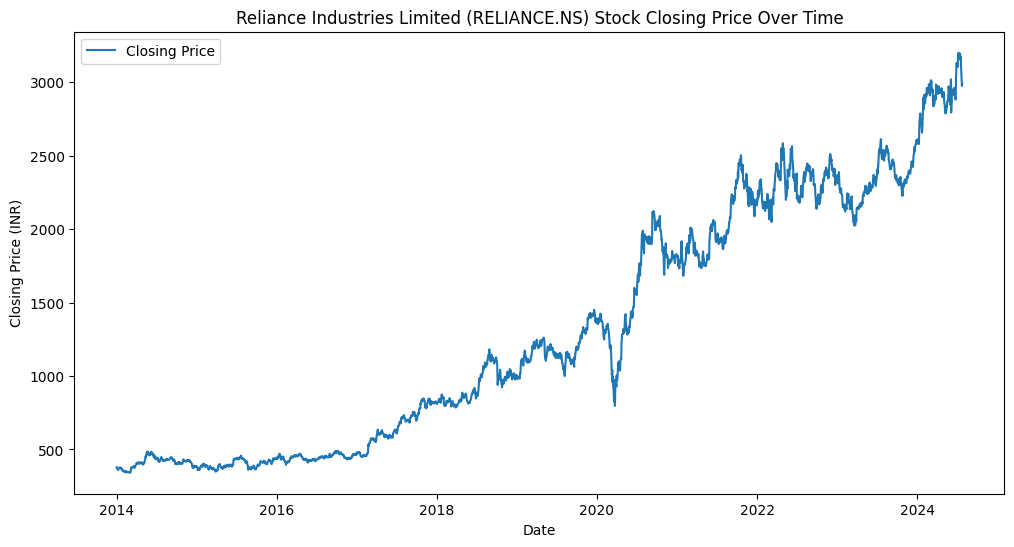

In [8]:
# Plot the closing price over time
plt.figure(figsize=(12, 6))
plt.plot(historical_data.index, historical_data['Close'], label='Closing Price')
plt.title('Reliance Industries Limited (RELIANCE.NS) Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()

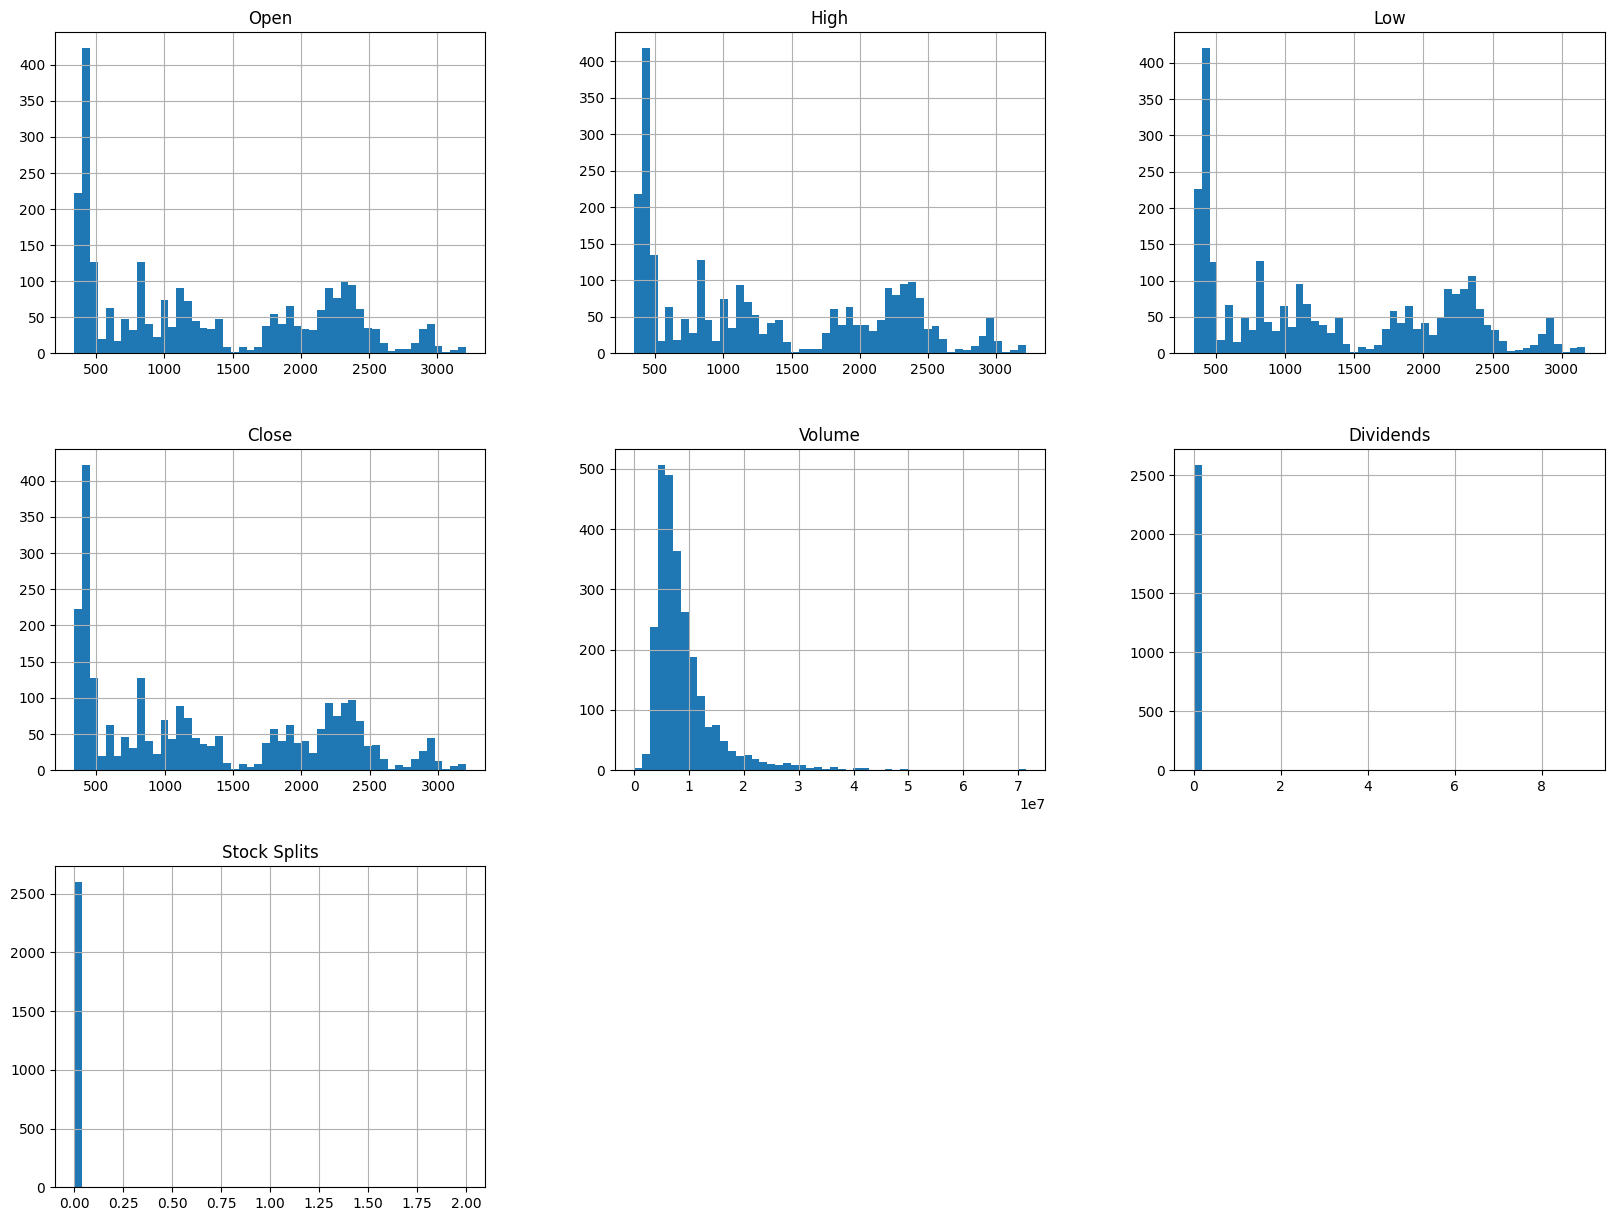

In [9]:
# Plot histograms for each numerical feature
historical_data.hist(bins=50, figsize=(20, 15))
plt.show()

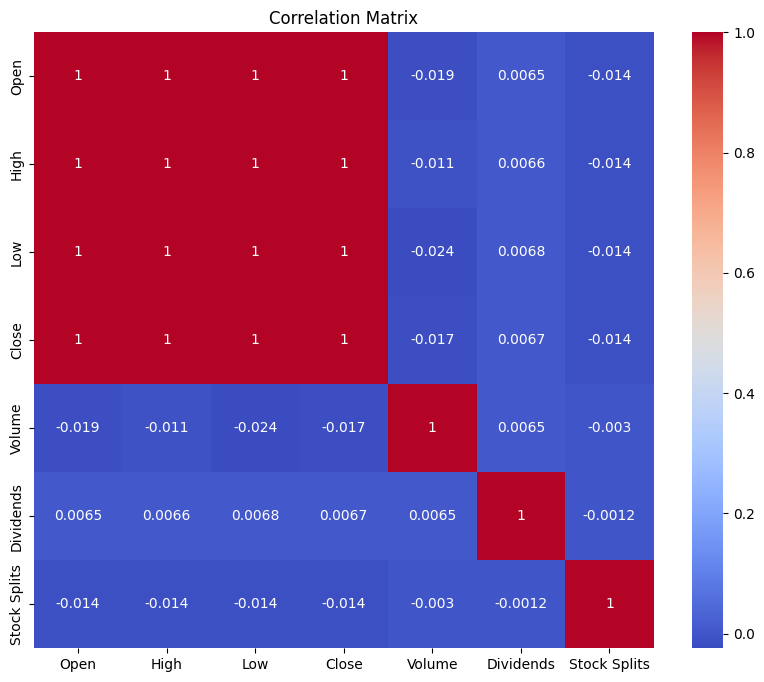

In [10]:
# Display the correlation matrix
correlation_matrix = historical_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [11]:
# Retain relevant columns
data = historical_data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [12]:
# Display the first few rows of the cleaned data
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-01 00:00:00+05:30,383.149017,383.490580,378.943754,379.456085,2924699
2014-01-02 00:00:00+05:30,378.986431,382.529969,371.472465,373.564423,3011816
2014-01-03 00:00:00+05:30,372.112852,372.859988,365.025804,368.974915,6416948
2014-01-06 00:00:00+05:30,368.056978,368.547963,362.891121,365.004425,6657928
2014-01-07 00:00:00+05:30,364.854996,367.139067,358.643160,359.518372,8655735


In [13]:
# Calculate correlation matrix
correlation_matrix = data.corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
             Open      High       Low     Close    Volume
Open    1.000000  0.999816  0.999804  0.999612 -0.018740
High    0.999816  1.000000  0.999763  0.999853 -0.011482
Low     0.999804  0.999763  1.000000  0.999839 -0.024332
Close   0.999612  0.999853  0.999839  1.000000 -0.017309
Volume -0.018740 -0.011482 -0.024332 -0.017309  1.000000


In [14]:
# Calculate skewness and kurtosis
skewness = data.skew()
kurtosis = data.kurtosis()
# Display skewness and kurtosis
print("\nSkewness:\n", skewness)
print("\nKurtosis:\n", kurtosis)


Skewness:
 Open      0.392037
High      0.389183
Low       0.396631
Close     0.393755
Volume    3.567498
dtype: float64

Kurtosis:
 Open      -1.273184
High      -1.274898
Low       -1.268732
Close     -1.269792
Volume    19.904142
dtype: float64


In [15]:
# Split data into features (X) and target (y)
X = data.drop('Close', axis=1)
y = data['Close']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
ridge = Ridge(alpha=1.0)  # Regularization strength can be tuned
lasso = Lasso(alpha=0.1)  # Regularization strength can be tuned
# Fit models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [18]:
# Predict on training and test sets
y_pred_lr_train = lr.predict(X_train)
y_pred_lr_test = lr.predict(X_test)

y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

y_pred_ridge_train = ridge.predict(X_train)
y_pred_ridge_test = ridge.predict(X_test)

y_pred_lasso_train = lasso.predict(X_train)
y_pred_lasso_test = lasso.predict(X_test)

In [19]:
# Calculate performance metrics for training data
rmse_lr_train = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
r2_lr_train = r2_score(y_train, y_pred_lr_train)

rmse_rf_train = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
r2_rf_train = r2_score(y_train, y_pred_rf_train)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
r2_ridge_train = r2_score(y_train, y_pred_ridge_train)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
r2_lasso_train = r2_score(y_train, y_pred_lasso_train)

In [20]:
# Calculate performance metrics for test data
rmse_lr_test = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
r2_lr_test = r2_score(y_test, y_pred_lr_test)

rmse_rf_test = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
r2_rf_test = r2_score(y_test, y_pred_rf_test)

rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))
r2_ridge_test = r2_score(y_test, y_pred_ridge_test)

rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))
r2_lasso_test = r2_score(y_test, y_pred_lasso_test)

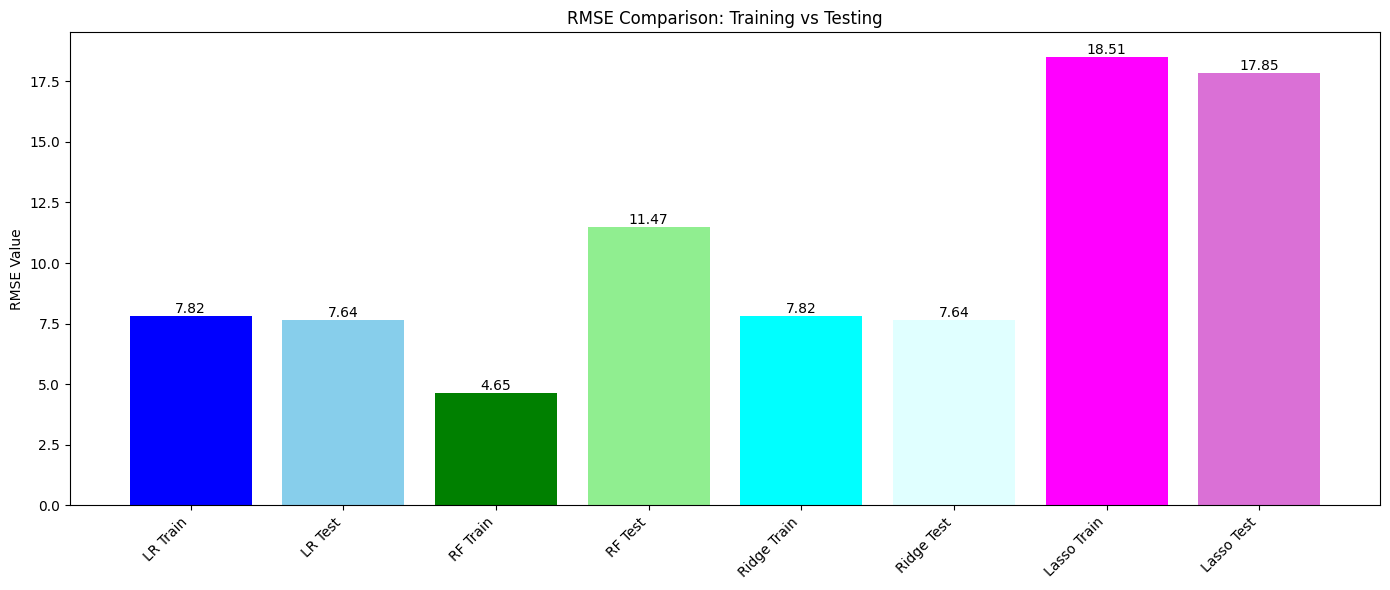

In [21]:
# RMSE Plotting
labels_rmse = [
    'LR Train', 'LR Test', 'RF Train', 'RF Test',
    'Ridge Train', 'Ridge Test', 'Lasso Train', 'Lasso Test'
]

rmse_values = [
    rmse_lr_train, rmse_lr_test, rmse_rf_train, rmse_rf_test,
    rmse_ridge_train, rmse_ridge_test, rmse_lasso_train, rmse_lasso_test
]

colors_rmse = [
    'blue', 'skyblue', 'green', 'lightgreen', 'cyan', 'lightcyan', 'magenta', 'orchid'
]

plt.figure(figsize=(14, 6))
bars_rmse = plt.bar(labels_rmse, rmse_values, color=colors_rmse)
plt.title('RMSE Comparison: Training vs Testing')
plt.ylabel('RMSE Value')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, max(rmse_values) + 1)  # Adjust y-axis limit for better visibility
plt.tight_layout()

# Add value labels on bars
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

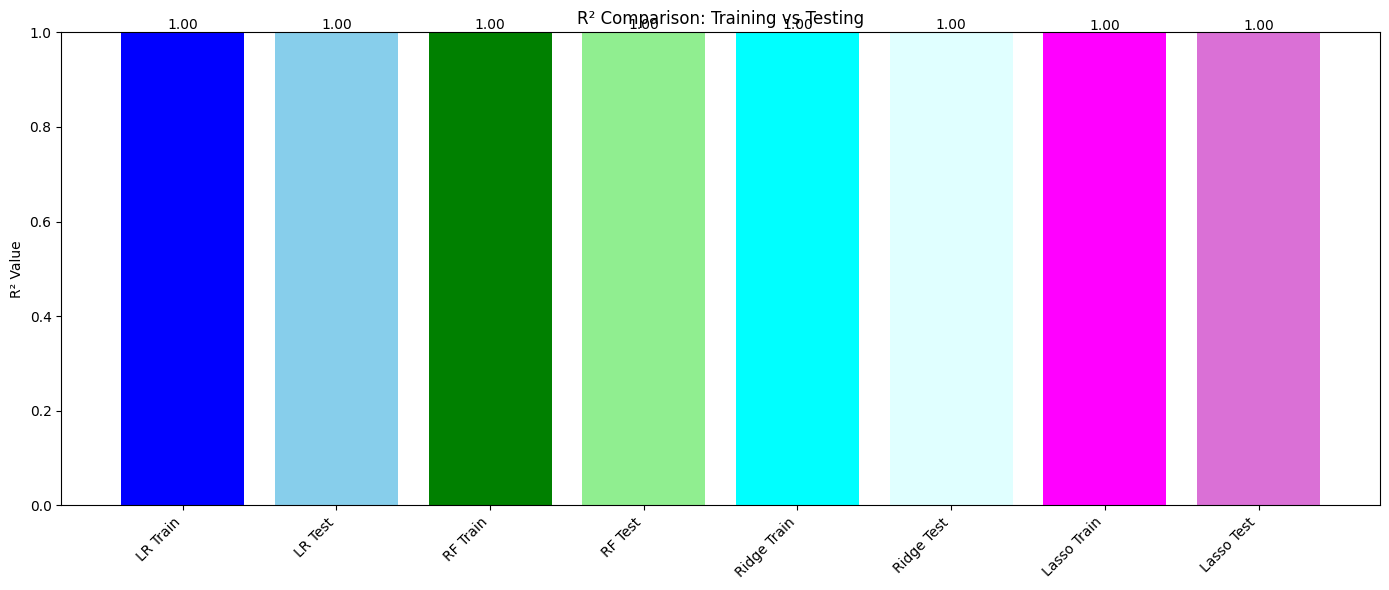

In [22]:
# R² Plotting
labels_r2 = [
    'LR Train', 'LR Test', 'RF Train', 'RF Test',
    'Ridge Train', 'Ridge Test', 'Lasso Train', 'Lasso Test'
]

r2_values = [
    r2_lr_train, r2_lr_test, r2_rf_train, r2_rf_test,
    r2_ridge_train, r2_ridge_test, r2_lasso_train, r2_lasso_test
]

colors_r2 = [
    'blue', 'skyblue', 'green', 'lightgreen', 'cyan', 'lightcyan', 'magenta', 'orchid'
]

plt.figure(figsize=(14, 6))
bars_r2 = plt.bar(labels_r2, r2_values, color=colors_r2)
plt.title('R² Comparison: Training vs Testing')
plt.ylabel('R² Value')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)  # R² values range from 0 to 1
plt.tight_layout()

# Add value labels on bars
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

plt.show()

In [23]:
# Define a dictionary to hold cross-validation scores
cv_scores = {
    'Linear Regression': cross_val_score(lr, X, y, cv=5, scoring='r2'),
    'Random Forest': cross_val_score(rf, X, y, cv=5, scoring='r2'),
    'Ridge Regression': cross_val_score(ridge, X, y, cv=5, scoring='r2'),
    'Lasso Regression': cross_val_score(lasso, X, y, cv=5, scoring='r2')
}


In [24]:
# Print cross-validation results
for model, scores in cv_scores.items():
    print(f"{model} - Cross-Validation R² Scores: {scores}")
    print(f"{model} - Mean R²: {scores.mean():.4f}")
    print(f"{model} - Standard Deviation: {scores.std():.4f}\n")

Linear Regression - Cross-Validation R² Scores: [0.99547027 0.99963779 0.99808273 0.99838679 0.99850679]
Linear Regression - Mean R²: 0.9980
Linear Regression - Standard Deviation: 0.0014

Random Forest - Cross-Validation R² Scores: [0.34080551 0.87533856 0.53188682 0.79005509 0.53824081]
Random Forest - Mean R²: 0.6153
Random Forest - Standard Deviation: 0.1931

Ridge Regression - Cross-Validation R² Scores: [0.99547027 0.99963779 0.99808273 0.99838679 0.99850679]
Ridge Regression - Mean R²: 0.9980
Ridge Regression - Standard Deviation: 0.0014

Lasso Regression - Cross-Validation R² Scores: [0.97798934 0.99821615 0.99004277 0.98856048 0.9927581 ]
Lasso Regression - Mean R²: 0.9895
Lasso Regression - Standard Deviation: 0.0066



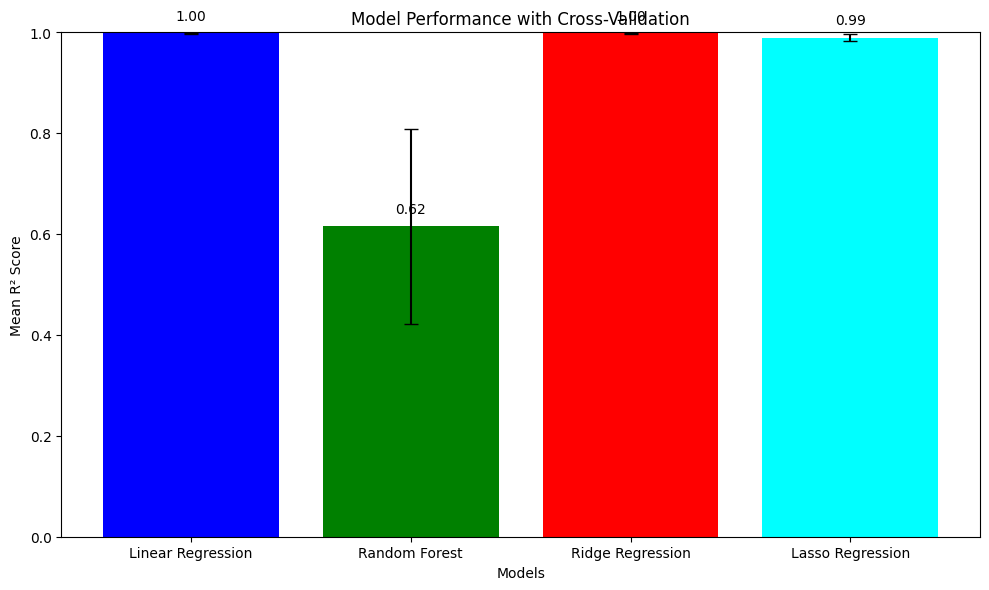

In [25]:
models = list(cv_scores.keys())
mean_r2 = [scores.mean() for scores in cv_scores.values()]
std_r2 = [scores.std() for scores in cv_scores.values()]

plt.figure(figsize=(10, 6))
bars = plt.bar(models, mean_r2, yerr=std_r2, capsize=5, color=['blue', 'green', 'red', 'cyan'])
plt.title('Model Performance with Cross-Validation')
plt.xlabel('Models')
plt.ylabel('Mean R² Score')
plt.ylim(0, 1)  # R² values range from 0 to 1

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Actual Value for 2024-07-23: 2975.80

Predictions:
Linear Regression: 2949.43
Random Forest: 2974.72
Ridge Regression: 2949.43
Lasso Regression: 2991.79


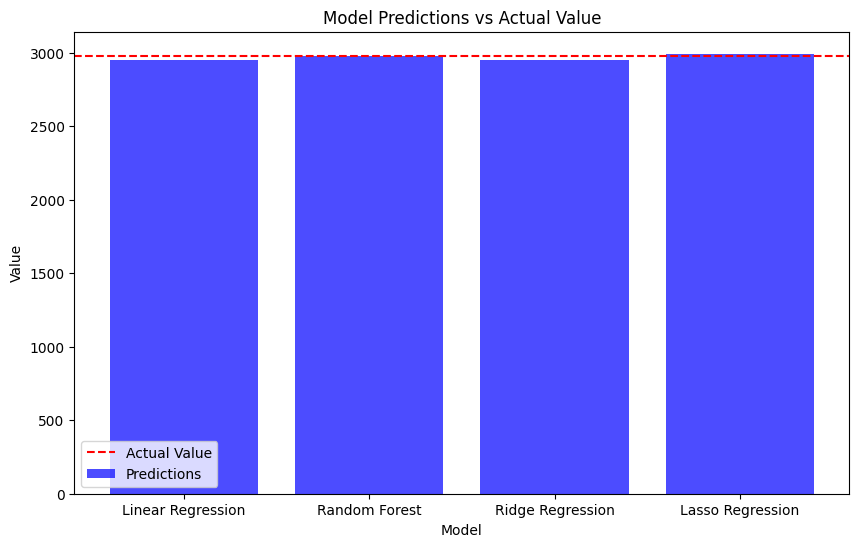

In [26]:
# Ensure the index is in datetime format and timezone-aware if necessary
historical_data.index = pd.to_datetime(historical_data.index).tz_localize(None)  # Remove timezone info if it's not needed

# Find the most recent date in the dataset
most_recent_date = historical_data.index.max()

# Find yesterday's date
yesterday_date = most_recent_date - timedelta(days=1)

# Ensure the index is timezone-naive for comparison
yesterday_date = yesterday_date.tz_localize(None)  # Convert to timezone-naive if necessary

# Check if we have data for yesterday
if yesterday_date in historical_data.index:
    # Extract the actual value for yesterday's data
    actual_value = historical_data.loc[yesterday_date]['Close']
    
    # Extract the features for yesterday's data
    yesterday_features = historical_data.loc[yesterday_date][['Open', 'High', 'Low', 'Volume']].values
    
    # Create DataFrame for prediction
    user_input_df = pd.DataFrame([yesterday_features], columns=['Open', 'High', 'Low', 'Volume'])
    
    # Predict using all models
    prediction_lr = lr.predict(user_input_df)
    prediction_rf = rf.predict(user_input_df)
    prediction_ridge = ridge.predict(user_input_df)
    prediction_lasso = lasso.predict(user_input_df)
    
    # Create a DataFrame for plotting
    predictions_df = pd.DataFrame({
        'Model': ['Linear Regression', 'Random Forest', 'Ridge Regression', 'Lasso Regression'],
        'Prediction': [prediction_lr[0], prediction_rf[0], prediction_ridge[0], prediction_lasso[0]],
        'Actual Value': [actual_value] * 4
    })
     # Print the actual value and predictions
    print(f"Actual Value for {yesterday_date.date()}: {actual_value:.2f}")
    print("\nPredictions:")
    for model, prediction in zip(predictions_df['Model'], predictions_df['Prediction']):
        print(f"{model}: {prediction:.2f}")
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(predictions_df['Model'], predictions_df['Prediction'], color='blue', alpha=0.7, label='Predictions')
    plt.axhline(y=actual_value, color='red', linestyle='--', label='Actual Value')
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title('Model Predictions vs Actual Value')
    plt.legend()
    plt.show()

else:
    print("No data available for yesterday.")